In [1]:
from rdkit import Chem
from rdkit.Chem import Draw
import matplotlib.pyplot as plt
from rdkit.Chem import rdDepictor
rdDepictor.SetPreferCoordGen(True)
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.molSize = (350, 350)
IPythonConsole.drawOptions.addAtomIndices = True
from openchemie import OpenChemIE
from PIL import Image
import numpy as np
from rdkit.Chem import AllChem
import cv2
import re
import torch
from openchemie import utils

import json

/Mounts/rbg-storage1/users/urop/vincentf/miniconda3/envs/openchemie/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
model = OpenChemIE(device = torch.device('cuda'))

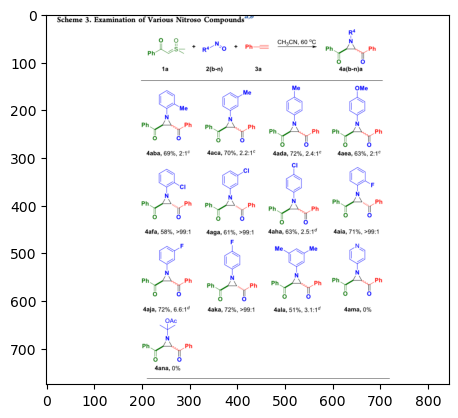

In [3]:
file_name = 'acs.joc.3c00062 example 2.png'

image_file = '../data/' + file_name

image = Image.open(image_file)

image_np = np.array(image)

plt.imshow(image_np)
plt.show()

In [4]:
results = model.extract_reactions_from_figures([image_np])

coref_results = model.extract_molecule_corefs_from_figures([image_np])

/Mounts/rbg-storage1/users/urop/vincentf/miniconda3/envs/openchemie/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Mounts/rbg-storage1/users/urop/vincentf/miniconda3/envs/openchemie/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/Mounts/rbg-storage1/users/urop/vincentf/miniconda3/envs/openchemie/lib/python3.9/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATe

Inspect the RxnScribe Outputs

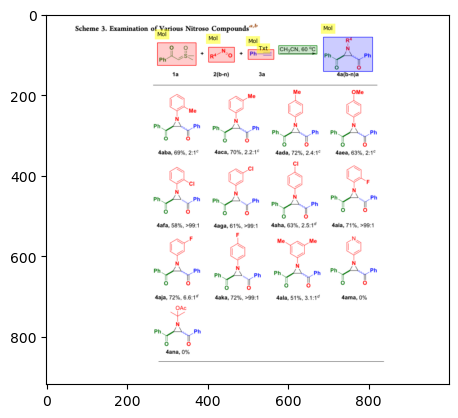

In [5]:
output = model.rxnscribe.draw_predictions(results[0]['reactions'], image_file = image_file)
plt.imshow(output[0])

{'O=C(c1ccccc1)[C@@H]1[C@@H](C(=O)c2ccccc2)N1c1cccc(F)c1': ['4aja, 72%, 6.6.1d'], 'O=C(c1ccccc1)[C@@H]1[C@@H](C(=O)c2ccccc2)N1c1ccccc1Cl': ['4afa, 58%, >99;1'], 'CC(=O)OC(C)(C)N1[C@H](C(=O)c2ccccc2)[C@H]1C(=O)c1ccccc1': ['4ana, 0%'], 'C[SH](C)(=O)/C=C(\\O)c1ccccc1': ['1a'], '[4*]N=O': ['2(b-n)'], 'O=C(c1ccccc1)[C@@H]1[C@@H](C(=O)c2ccccc2)N1c1cccc(Cl)c1': ['4aga, 61% , >99;1'], 'O=C(c1ccccc1)[C@@H]1[C@@H](C(=O)c2ccccc2)N1c1ccc(F)cc1': ['4aka, 729, >99.1'], 'C#Cc1ccccc1': ['3a'], 'Cc1ccc(N2[C@H](C(=O)c3ccccc3)[C@H]2C(=O)c2ccccc2)cc1': ['4ada, 729, 2.4-1c'], 'Cc1cc(C)cc(N2[C@H](C(=O)c3ccccc3)[C@H]2C(=O)c2ccccc2)c1': ['4ala, 51%, 3.-', '1:10'], '[4*]N1[C@H](C(=O)c2ccccc2)[C@H]1C(=O)c1ccccc1': ['4a(b-nJa'], 'COc1ccc(N2[C@H](C(=O)c3ccccc3)[C@H]2C(=O)c2ccccc2)cc1': ['63%, 2.1c', '4aea,'], 'O=C(c1ccccc1)[C@@H]1[C@@H](C(=O)c2ccccc2)N1c1ccncc1': ['4ama, 0%']}


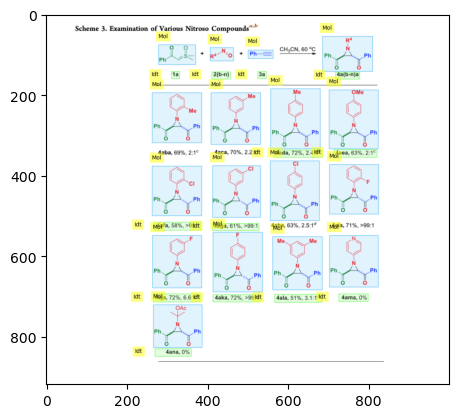

In [6]:
coref_output = model.moldet.draw_bboxes(coref_results[0], image_file = image_file, coref = True)

plt.imshow(coref_output[0])

coref_results_dict = {coref_results[0]['bboxes'][coref[0]]['smiles']: coref_results[0]['bboxes'][coref[1]]['text']  for coref in coref_results[0]['corefs']}

print(coref_results_dict)

C[SH](C)(=O)/C=C(\O)c1ccccc1


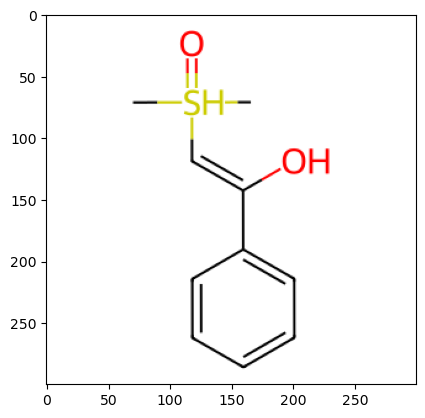

[4*]N=O


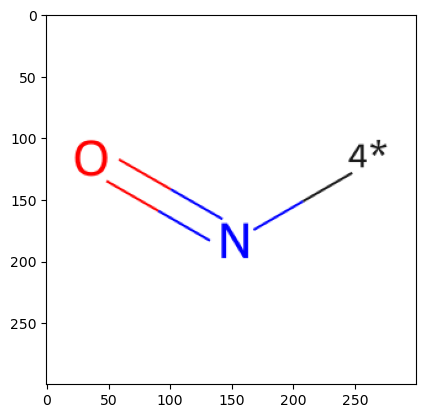

C#Cc1ccccc1


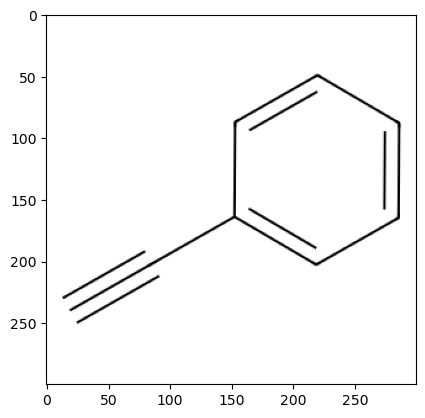

[4*]N1[C@H](C(=O)c2ccccc2)[C@H]1C(=O)c1ccccc1


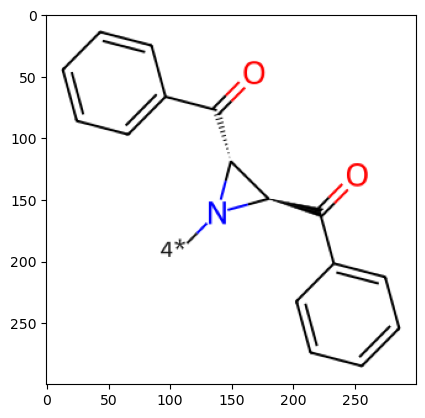

In [18]:
reactants_array = []
products = []

for reactant in results[0]['reactions'][0]['reactants']:
    print(reactant['smiles'])
    reactants_array.append(reactant['smiles'])
    i = Draw.MolToImage(Chem.MolFromSmiles(reactant['smiles']))
    plt.imshow(i)
    plt.show()
for product in results[0]['reactions'][0]['products']:
    print(product['smiles'])
    products.append(product['smiles'])
    i = Draw.MolToImage(Chem.MolFromSmiles(product['smiles']))
    plt.imshow(i)
    plt.show()

backout the reactants and do manual evaluation

In [19]:
backed_out = utils.backout(results, coref_results)

these are the predicted reactants corresponding the product with label 4aja, 72%, 6.6.1d
C[SH](C)(=O)/C=C(\O)c1ccccc1


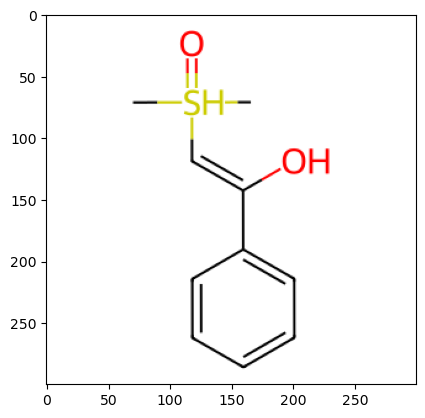

O=Nc1cccc(F)c1


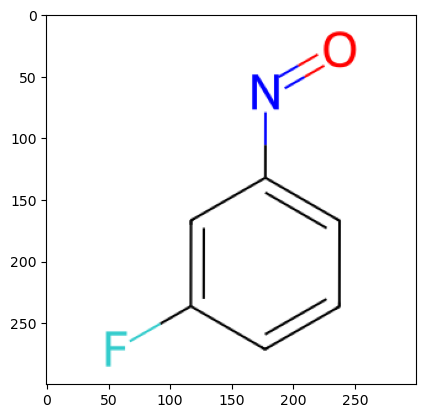

C#Cc1ccccc1


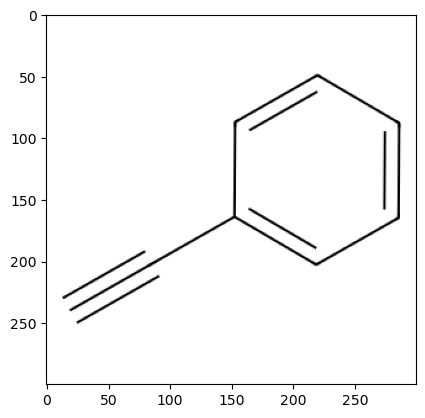

these are the predicted reactants corresponding the product with label 4afa, 58%, >99;1
C[SH](C)(=O)/C=C(\O)c1ccccc1


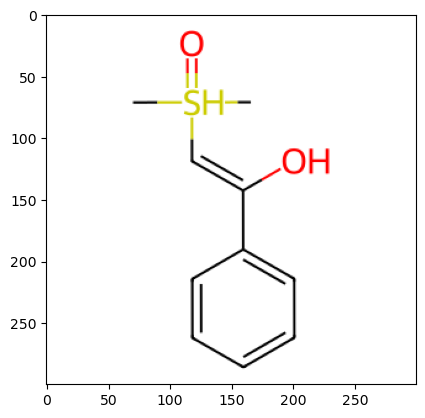

O=Nc1ccccc1Cl


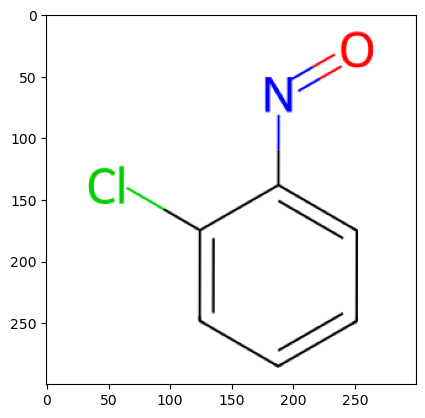

C#Cc1ccccc1


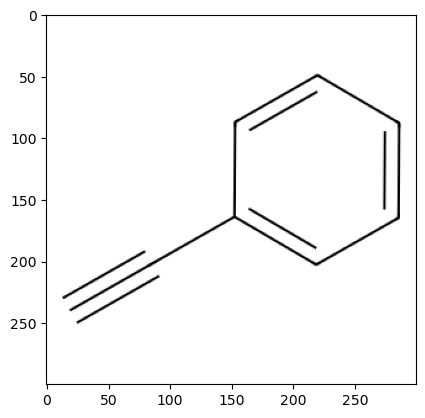

these are the predicted reactants corresponding the product with label 4ana, 0%
C[SH](C)(=O)/C=C(\O)c1ccccc1


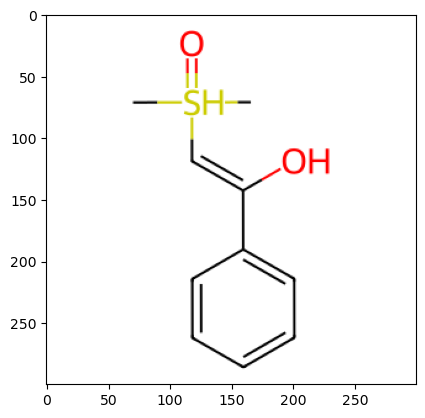

CC(=O)OC(C)(C)N=O


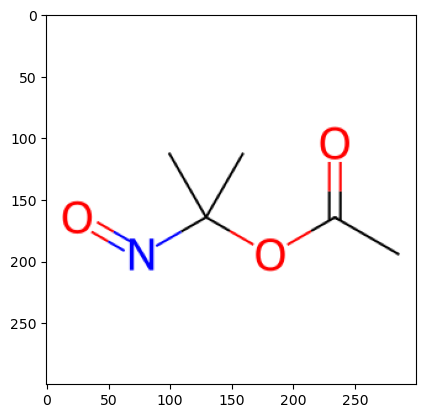

C#Cc1ccccc1


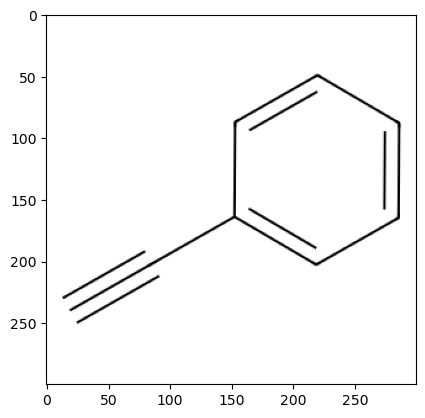

these are the predicted reactants corresponding the product with label 4aga, 61% , >99;1
C[SH](C)(=O)/C=C(\O)c1ccccc1


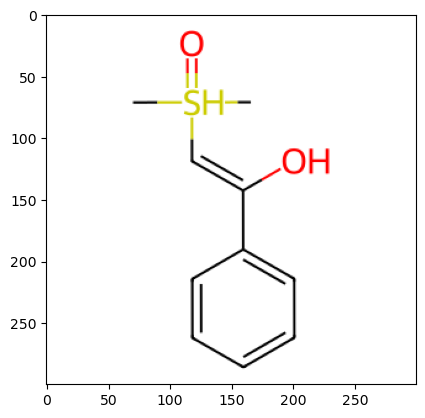

O=Nc1cccc(Cl)c1


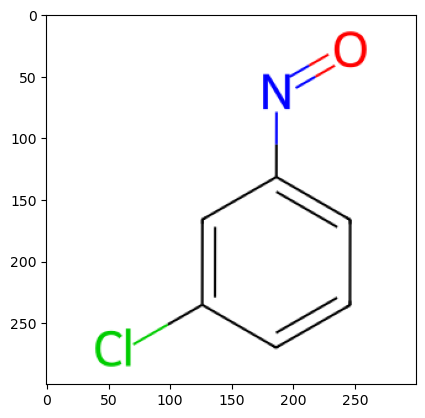

C#Cc1ccccc1


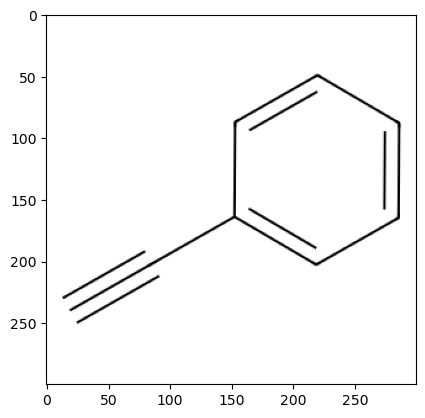

these are the predicted reactants corresponding the product with label 4aka, 729, >99.1
C[SH](C)(=O)/C=C(\O)c1ccccc1


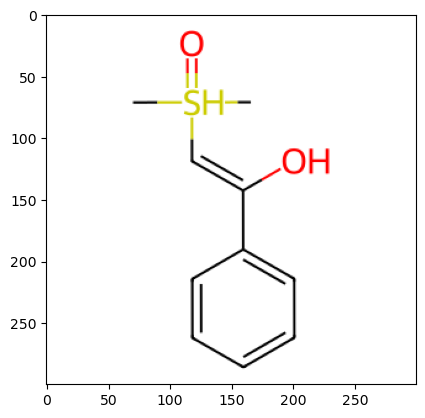

O=Nc1ccc(F)cc1


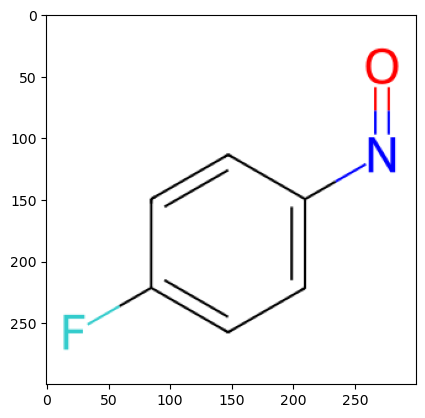

C#Cc1ccccc1


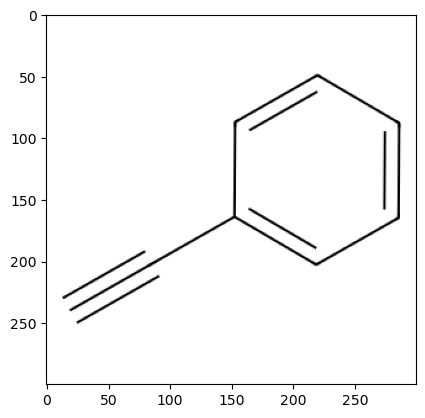

these are the predicted reactants corresponding the product with label 4ada, 729, 2.4-1c
C[SH](C)(=O)/C=C(\O)c1ccccc1


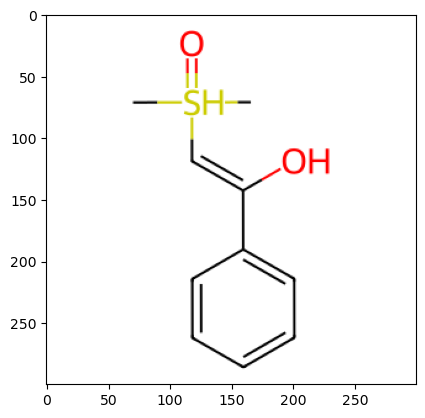

Cc1ccc(N=O)cc1


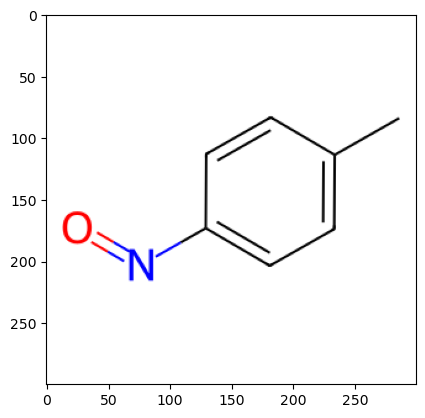

C#Cc1ccccc1


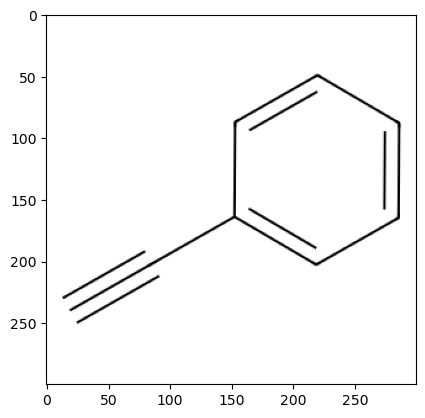

these are the predicted reactants corresponding the product with label 4ala, 51%, 3.-
C[SH](C)(=O)/C=C(\O)c1ccccc1


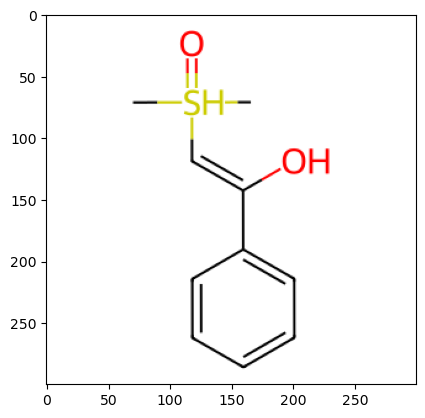

Cc1cc(C)cc(N=O)c1


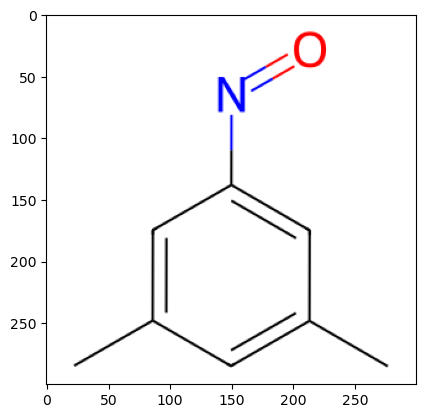

C#Cc1ccccc1


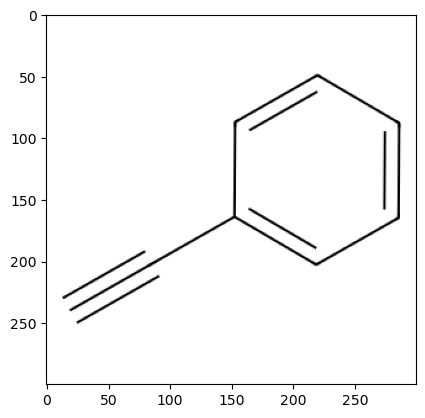

these are the predicted reactants corresponding the product with label 4a(b-nJa
C[SH](C)(=O)/C=C(\O)c1ccccc1


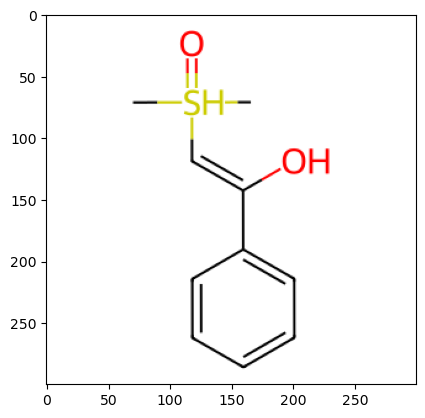

[4*]N=O


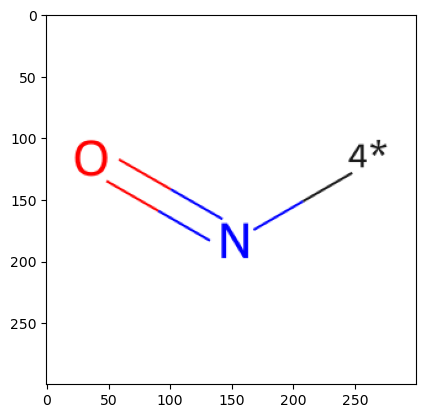

C#Cc1ccccc1


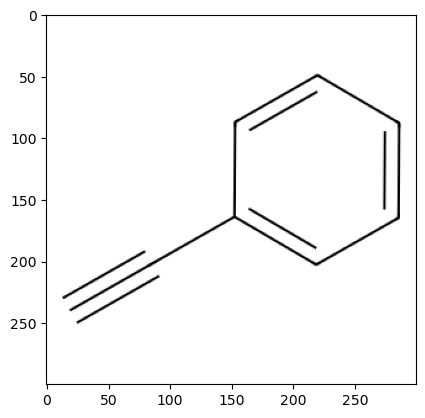

these are the predicted reactants corresponding the product with label 4aea,
C[SH](C)(=O)/C=C(\O)c1ccccc1


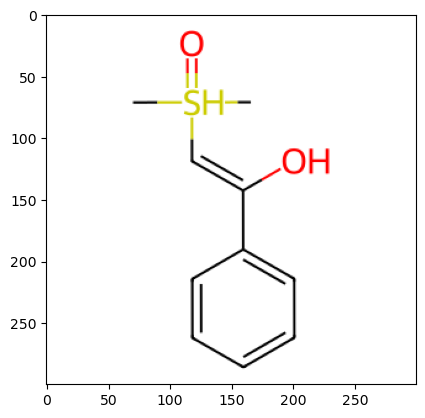

COc1ccc(N=O)cc1


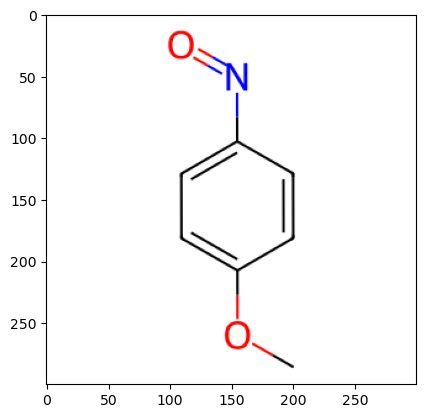

C#Cc1ccccc1


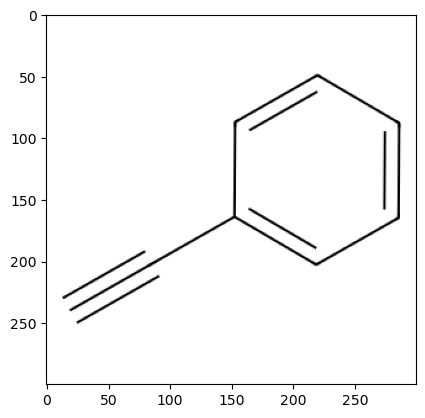

these are the predicted reactants corresponding the product with label 4ama, 0%
C[SH](C)(=O)/C=C(\O)c1ccccc1


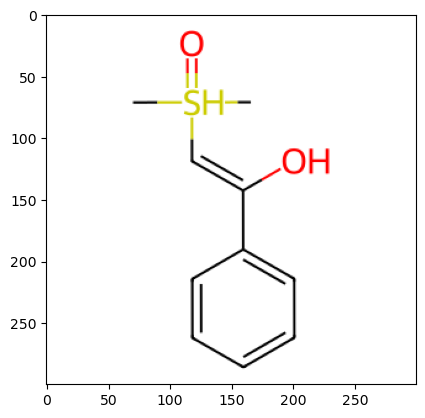

O=Nc1ccncc1


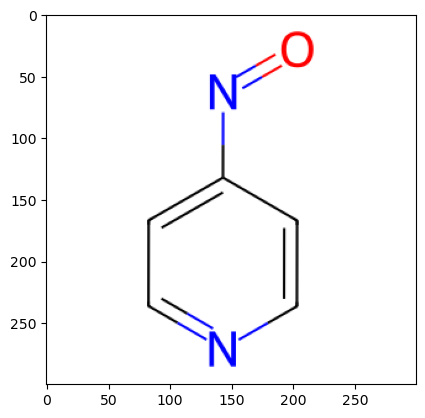

C#Cc1ccccc1


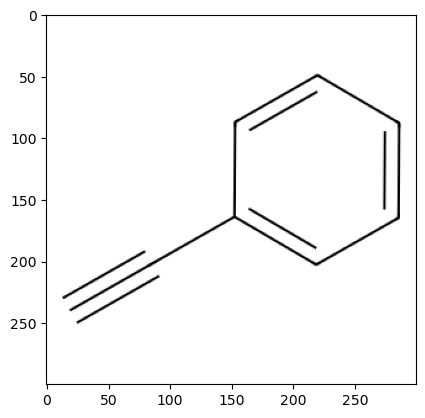

In [8]:
extracted_reactants = {}

for reactants, _, label in backed_out:
    print(f'these are the predicted reactants corresponding the product with label {label}')
    extracted_reactants[label] = []
    for molecule in reactants:
        print(molecule)
        extracted_reactants[label].append(molecule)
        i = Draw.MolToImage(Chem.MolFromSmiles(molecule))
        plt.imshow(i)
        plt.show()

backout results:

molscribe for reactants wrong, but not for the relevant reactant

4b 
4c 
4d yes
4e yes
4f yes
4g yes
4h 
4i 
4j yes
4k yes
4l yes
4m yes
4n yes

precision 9/13 recall 9/10